# Single-image Super-resolution Generative Adversarial Networks - Test

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy
import os
import sys
import glob
from keras.optimizers import Adam
from skimage.transform import resize
import matplotlib.pylab as plt
import nibabel as nib
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import sr_gan

/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load trained generator
generator = sr_gan.build_generator(nchannels= 3)
optimizer = Adam(0.0002, 0.5)
generator.compile(loss='binary_crossentropy', optimizer=optimizer)
generator.load_weights("../Data/generator.hdf5")

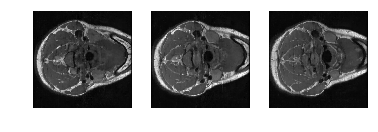

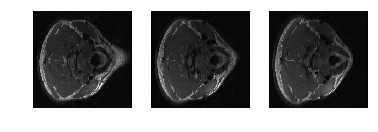

In [3]:
imgs_list = ["/media/roberto/DATA/GDrive/MR-Data/Carotid/Original-nifti/Djm__20130310182345_101_cca.nii.gz",\
             "/media/roberto/DATA/GDrive/MR-Data/Carotid/Original-nifti/Kmd__20130310143610_101_cca.nii.gz"]

for img in imgs_list:
    data = nib.load(img)
    affine = data.affine
    data = data.get_data().transpose(2,0,1)
    #Normalization
    data = 255.0*(data-data.min(axis=(1,2),keepdims = True))/(data.max(axis=(1,2),keepdims = True)\
              -data.min(axis=(1,2),keepdims = True))
    data = data/127.5 - 1.
    data = np.array([data,data,data]).transpose(1,2,3,0)
    data_sr = generator.predict(data,batch_size=8).mean(axis=-1)
    data_sr = ((data_sr + 1)*127.5)
    nifti = nib.Nifti1Image((data_sr).transpose(1,2,0), affine)
    nib.save(nifti,"../Data/SR-results/" + img.split("/")[-1].split(".")[0]+ "_sr_gan_2x.nii.gz")
    plt.figure()
    plt.subplot(131)
    plt.imshow(data_sr[0,:,:],cmap = "gray")
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(data_sr[16,:,:],cmap = "gray")
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(data_sr[32,:,:],cmap = "gray")
    plt.axis("off")
    plt.show()

/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/scikit_image-0.14.dev0-py2.7-linux-x86_64.egg/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


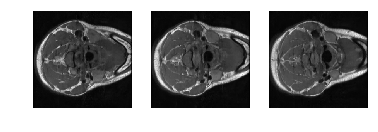

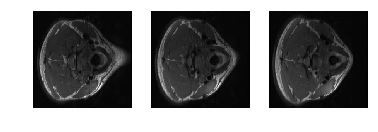

In [4]:
for img in imgs_list:
    data = nib.load(img)
    affine = data.affine
    data = data.get_data().transpose(2,0,1)
    #Normalization
    data = 255.0*(data-data.min(axis=(1,2),keepdims = True))/(data.max(axis=(1,2),keepdims = True)\
              -data.min(axis=(1,2),keepdims = True))
    data_lr = np.zeros((data.shape[0],int(data.shape[1]/2),int(data.shape[2]/2)))
    
    for ii in xrange(data_lr.shape[0]):
        data_lr[ii] = resize(data[ii],(int(data.shape[1]/2),int(data.shape[2]/2)),anti_aliasing = True)
        
    
    data_lr = data_lr/127.5 - 1.
    data_lr = np.array([data_lr,data_lr,data_lr]).transpose(1,2,3,0)
    data_sr = generator.predict(data_lr,batch_size=8).mean(axis=-1)
    data_sr = ((data_sr + 1)*127.5)
    nifti = nib.Nifti1Image((data_sr).transpose(1,2,0), affine)
    nib.save(nifti,"../Data/SR-results/" + img.split("/")[-1].split(".")[0]+ "_sr_gan.nii.gz")
    plt.figure()
    plt.subplot(131)
    plt.imshow(data_sr[0,:,:],cmap = "gray")
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(data_sr[16,:,:],cmap = "gray")
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(data_sr[32,:,:],cmap = "gray")
    plt.axis("off")
    plt.show()